In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm, trange

In [2]:
def circle(r, x, h, k, how):
    if how=='n':
      return -math.sqrt(r**2 - (x-h)**2) + k
    if how=='p':
      return math.sqrt(r**2 - (x-h)**2) + k
    else:
       raise ValueError("how must be 'n' or 'p'")


def in_Fig(x,y, radio):

  fig_in= []
  
  if math.sqrt(x**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt(x**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  return all(fig_in)

  # theorical area
def theorical_area(radio):
    return radio**2*(1+math.pi/3-math.sqrt(3))

tharea = theorical_area(20)

In [242]:
radio = 20
mag = 100
fig = plt.figure(figsize = (5,5))
x = np.linspace(0, 20, num = radio*mag)

circle_ = lambda r, x: circle(r, x, 0, 0, 'p')
circle_x = lambda r, x: circle(r, x, r, 0, 'p')
circle_y = lambda r, x: circle(r, x, 0, r, 'n')
circle_xy = lambda r, x: circle(r, x, r, r, 'n')


circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]


<Figure size 500x500 with 0 Axes>

  0%|          | 0/100000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Área de la figura: 126.112 u^2')

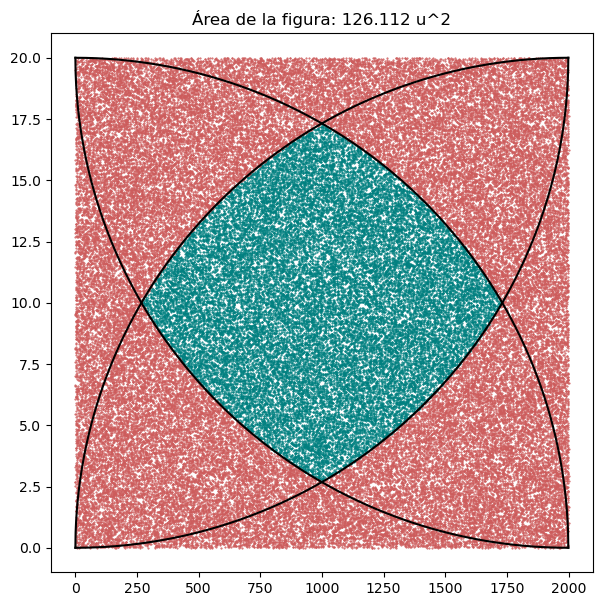

In [243]:
points = 100000
xs,ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
points_in,xv, yv = [], [], []

for x, y in tqdm(zip(xs,ys), total = points):
    if in_Fig(x,y, radio):
        points_in.append(True)
    else:
        points_in.append(False)
    xv.append(x)
    yv.append(y)

xv, yv = np.array(xv), np.array(yv)

fig = plt.figure(figsize = (7,7))

dentro = np.where(points_in)[0]
fuera = np.where(np.logical_not(points_in))[0]

plt.plot(xv[dentro]*mag, yv[dentro], 'o', color = 'teal', markersize = 0.5)
plt.plot(xv[fuera]*mag, yv[fuera], 'o', color = 'indianred', markersize = 0.5)

plt.plot(circle1, color='black')
plt.plot(circle2, color='black')
plt.plot(circle3, color='black')
plt.plot(circle4, color='black')

in_prctg = len(dentro)/points
area = radio**2*in_prctg
plt.title(f'Área de la figura: {area} u^2')


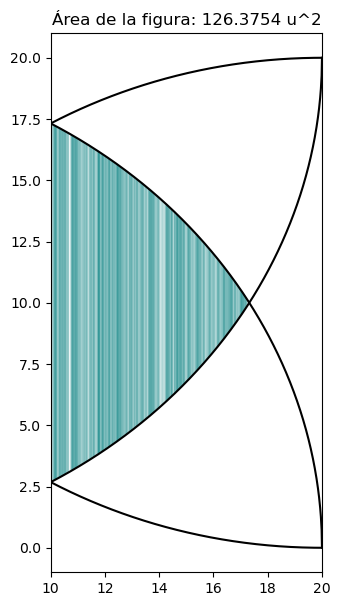

In [231]:
# Code
a, b = 0, 20
fig = plt.figure(figsize = (3.5,7))

x = np.linspace(a, b, num = 1500)

circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]

plt.xlim(10,radio)

b = x[np.where(np.round(circle1, 2) == np.round(circle3, 2))[0][0]]
a=10

n = 1000

width = (b-a)/n

xi_random = np.random.random(size=n)*(b-a) + a

circle1_r = [circle_(radio, x) for x in xi_random]
circle3_r = [circle_y(radio, x) for x in xi_random]


plt.vlines(xi_random, circle3_r, circle1_r, colors='teal', linewidth=0.1)

hieght = np.array(circle1_r) - np.array(circle3_r)
area = np.sum(hieght*width)*2

plt.title(f'Área de la figura: {round(area, 4)} u^2')

plt.plot(x, circle1, color='black')
plt.plot(x, circle3, color='black')
plt.plot(x, circle2, color='black')
plt.plot(x, circle4, color='black')


In [17]:
def hit_and_miss(radio = 20, points = 1_000_000):
    xs,ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
    points_in,xv, yv = [], [], []

    for x, y in zip(xs,ys):
        if in_Fig(x,y, radio):
            points_in.append(True)
        else:
            points_in.append(False)
        xv.append(x)
        yv.append(y)

    xv, yv = np.array(xv), np.array(yv)

    dentro = np.where(points_in)[0]
    fuera = np.where(np.logical_not(points_in))[0]
    in_prctg = len(dentro)/points
    area = radio**2*in_prctg

    return area


def sampling(radio = 20, n = 1_000_000):
    a,b = 0, radio
    x = np.linspace(a, b, num = 1500)
    circle1 = [circle_(radio, x) for x in x]
    circle3 = [circle_y(radio, x) for x in x]
    b = x[np.where(np.round(circle1, 2) == np.round(circle3, 2))[0][0]]
    a=radio/2

    width = (b-a)/n

    xi_random = np.random.random(size=n)*(b-a) + a

    circle1_r = [circle_(radio, x) for x in xi_random]
    circle3_r = [circle_y(radio, x) for x in xi_random]

    hieght = np.array(circle1_r) - np.array(circle3_r)
    area = np.sum(hieght*width)*2
    return area


In [192]:
iterations = [10, 100, 1_000, 10_000 ,100_000]
n = 5000
hm_areas, s_areas = [], []

for iteration in iterations:
    hm_mean, s_mean = [], []
    for _ in trange(n):
        hm_mean.append(hit_and_miss(points = iteration))
        s_mean.append(sampling(n = iteration))
    hm_areas.append(np.mean(hm_mean))
    s_areas.append(np.mean(s_mean))



Hit and Miss [0.051702548911919166, 0.05021745108807352, 0.02394545108808188, 0.001307051088076605]
Sampling [0.021892261952501713, 0.021752599005949946, 0.012446448014458156, 0.0008028396092498724]


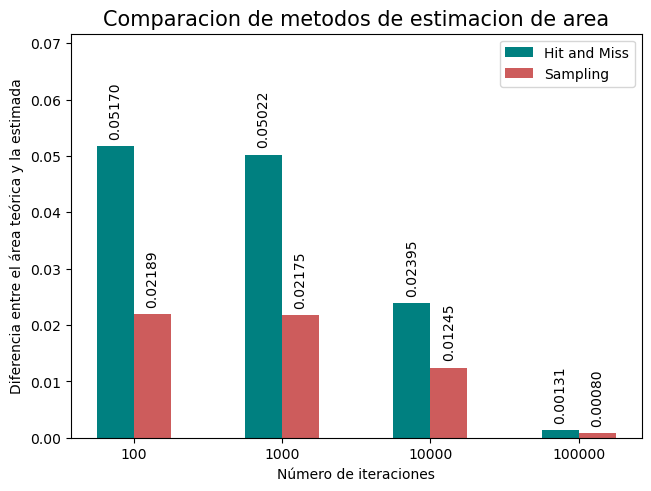

In [250]:
hm_diff = [abs(tharea - area) for area in hm_areas]
s_diff = [abs(tharea - area) for area in s_areas]

iterations = [10, 100, 1_000, 10_000 ,100_000]

hm_diff = hm_diff[1:]
s_diff = s_diff[1:]
iterations = iterations[1:]

x_ = np.array(iterations).astype(str)

area_means = {
    'Hit and Miss': hm_diff,
    'Sampling': s_diff
    }

colors = ['teal', 'indianred']

x = np.arange(len(x_))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for attribute, measurement in area_means.items():
    print(attribute, measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset+ 0.125, measurement, width, label=attribute, color = colors[multiplier])
    ax.bar_label(rects, padding=5, rotation=90, fontsize = 10, fmt='%.5f')
    multiplier += 1

ax.set_xticks(x + width, x_, minor=False)
ax.legend()
y_max = max(max(hm_diff), max(s_diff))
plt.ylim(0, y_max + 0.02)
ax.set_title("Comparacion de metodos de estimacion de area", fontsize = 15)

ax.set_ylabel("Diferencia entre el área teórica y la estimada")
ax.set_xlabel("Número de iteraciones")

plt.show()

In [254]:
s_areas

[126.59074231538916,
 126.03680518913558,
 126.08045005009403,
 126.07114389910254,
 126.05789461147883]